# 使用KNN进行分类

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

## 数据勘查

In [3]:
# 读取鸢尾花数据集
# header参数指定标题的行，默认为0，如果没有标题则使用None
data = pd.read_csv(r'../Datasets/iris.csv', header=0)

data.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
78,79,6.0,2.9,4.5,1.5,Iris-versicolor
80,81,5.5,2.4,3.8,1.1,Iris-versicolor
12,13,4.8,3.0,1.4,0.1,Iris-setosa
105,106,7.6,3.0,6.6,2.1,Iris-virginica
85,86,6.0,3.4,4.5,1.6,Iris-versicolor


In [4]:
# 删除不需要的列：Id
data.drop('Id', axis=1, inplace=True)

In [5]:
# 将类别文本映射为数值类型
data['Species'] = data['Species'].map({'Iris-setosa':0, 'Iris-virginica':1, 'Iris-versicolor':2})

In [6]:
# 检验数据集中是否有重复记录
data.duplicated().any()

True

In [7]:
# 删除数据集中的重复记录
data.drop_duplicates(inplace=True)

In [8]:
# 查看不同类别的鸢尾花各有多少条记录
data['Species'].value_counts()

2    50
1    49
0    48
Name: Species, dtype: int64

## 算法实现

In [9]:
class KNN:
    # 初始化方法
    def __init__(self, k):
        self.k = k
        
    # 训练方法
    def fit(self, X, y):
        self.X = np.asarray(X)
        self.y = np.asarray(y)
        
    # 预测方法
    def predict(self, X):
        X = np.asarray(X)
        result = []
        
        # 对ndarray进行遍历，每次取数组中的一行进行运算（数组之间对位运算）
        for x in X:
            # 对于数据集中的每一个样本，依次与所有样本求欧氏距离
            dis = np.sqrt(np.sum((x - self.X) ** 2, axis=1))
            
            # 返回数组排序后，每个元素在原数组（排序之前的数组）中的索引
            index = dis.argsort()
            
            # 进行截断，只取前k个元素，取距离最近的k个元素的索引
            index = index[:self.k]
            
            # 返回数组中每个元素出现的次数，元素必须是非负的整数
            count = np.bincount(self.y[index])
            
            # 考虑权重
            #count = np.bincount(self.y[index], weights=1/dis[index])
            
            # 返回数组中值最大的元素对应的索引，该索引就是判定的索引
            # 最大元素索引，就是出现次数最多的元素
            result.append(count.argmax())
        
        return np.asarray(result)

In [10]:
# 提取每个类别的鸢尾花数据
d0 = data[data['Species'] == 0]
d1 = data[data['Species'] == 1]
d2 = data[data['Species'] == 2]

# 对每个类别数据进行随机排序
d0 = d0.sample(len(d0), random_state=0)
d1 = d1.sample(len(d1), random_state=0)
d2 = d2.sample(len(d2), random_state=0)

In [11]:
# 构建训练集
train_X = pd.concat([d0.iloc[:40, :-1], d1.iloc[:40, :-1], d2.iloc[:40, :-1]], axis=0)
train_y = pd.concat([d0.iloc[:40, -1], d1.iloc[:40, -1], d2.iloc[:40, -1]], axis=0)

# 构建测试集
test_X = pd.concat([d0.iloc[40:, :-1], d1.iloc[40:, :-1], d2.iloc[40:, :-1]], axis=0)
test_y = pd.concat([d0.iloc[40:, -1], d1.iloc[40:, -1], d2.iloc[40:, -1]], axis=0)

In [17]:
# 创建KNN对象
knn = KNN(k=3)

# 训练
knn.fit(train_X, train_y)

# 预测
result = knn.predict(test_X)

print('预测结果：')
display(result)

print('准确率：')
display(np.sum(result == test_y) / len(test_y))

预测结果：


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2], dtype=int64)

准确率：


0.9629629629629629

## 数据可视化

In [18]:
# 设置matplotlib支持中文
mpl.rcParams['font.family'] = 'SimHei'

# 设置在使用中文字体时，能够正常显示负号(-)
mpl.rcParams['axes.unicode_minus'] = False

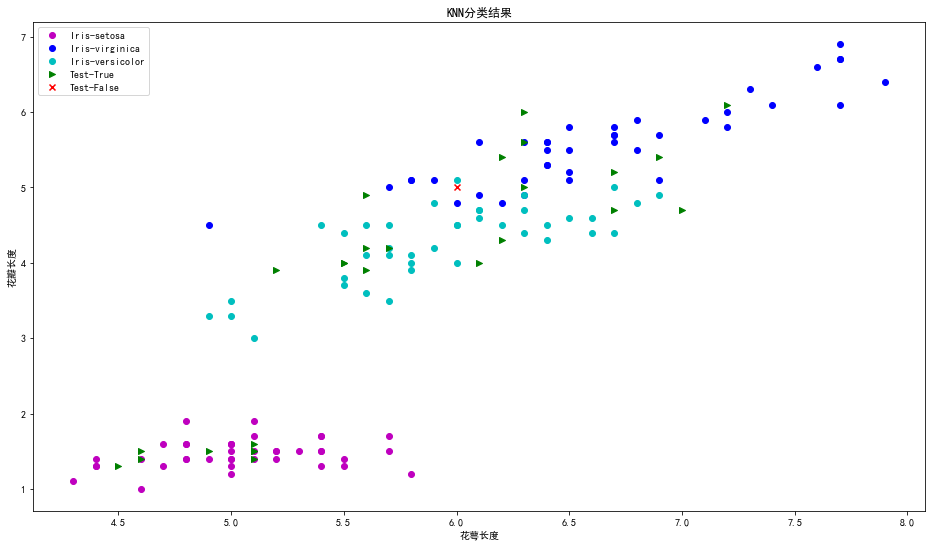

In [37]:
# 设置图表大小
plt.figure(figsize=(16, 9))

# 绘制训练数据集
plt.scatter(x=d0['SepalLengthCm'][:40], y=d0['PetalLengthCm'][:40], color='m', label='Iris-setosa')
plt.scatter(x=d1['SepalLengthCm'][:40], y=d1['PetalLengthCm'][:40], color='b', label='Iris-virginica')
plt.scatter(x=d2['SepalLengthCm'][:40], y=d2['PetalLengthCm'][:40], color='c', label='Iris-versicolor')

# 绘制测试数据集
test_true = test_X[result == test_y]
test_false = test_X[result != test_y]
plt.scatter(x=test_true['SepalLengthCm'], y=test_true['PetalLengthCm'], color='g', marker='>', label='Test-True')
plt.scatter(x=test_false['SepalLengthCm'], y=test_false['PetalLengthCm'], color='r', marker='x', label='Test-False')

# 渲染图表
plt.xlabel('花萼长度')
plt.ylabel('花瓣长度')
plt.title('KNN分类结果')
plt.legend(loc='best')
plt.show()